# Prepare Qiskit Challenge 2021
#### --reference:
* [qiskit introduction](https://qiskit.org/textbook/ch-states/atoms-computation.html)

## Create Qiskit Circuit and draw

In [1]:
# Create simple circuit and simple draw
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

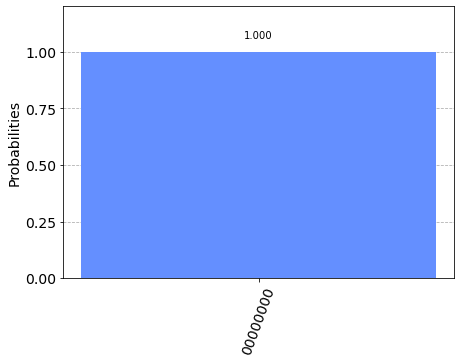

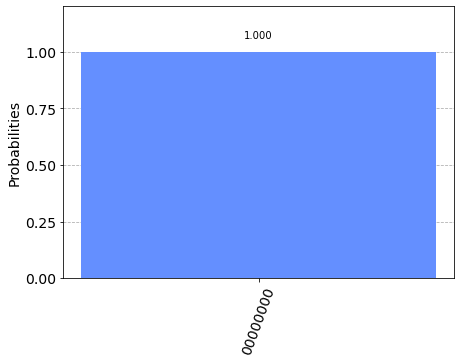

In [3]:
sim = Aer.get_backend("aer_simulator")
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
# create Circuit with classical bits
n_qbits = 2
n_cbits = 2
fst_qubit, fst_cbit = 0, 0
sec_qubit, sec_cbit  = 1, 1

qc = QuantumCircuit(n_qbits, n_cbits)
qc.x(fst_qubit)
qc.cx(fst_qubit, sec_qubit)
qc.measure(fst_qubit, fst_cbit)
qc.measure(sec_qubit, sec_cbit)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## Qiskit Gates

In [9]:
# NOT gate
qc_mnot = QuantumCircuit(4, 2)
qc_mnot.x(0)
qc_mnot.barrier()
# CNOT gate
qc_mnot.cx(0, 1) # (control qubit, target qubit)
# CCNOT gate
qc_mnot.ccx(0, 1, 2) # (control qubit, control qubit, target qubit)
qc_mnot.barrier()
# measure
qc_mnot.measure(2, 0)
qc_mnot.measure(3, 1)
qc_mnot.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────■───░───────
     └───┘ ░ ┌─┴─┐  │   ░       
q_1: ──────░─┤ X ├──■───░───────
           ░ └───┘┌─┴─┐ ░ ┌─┐   
q_2: ──────░──────┤ X ├─░─┤M├───
           ░      └───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

## [State Vector](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)

output state vector:  [0.+0.j 1.+0.j]
output histogram


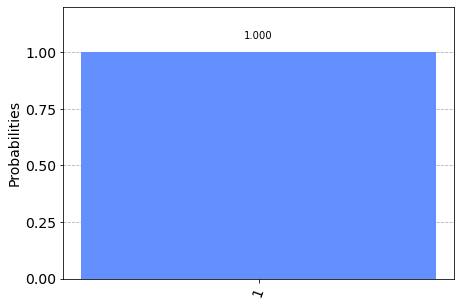

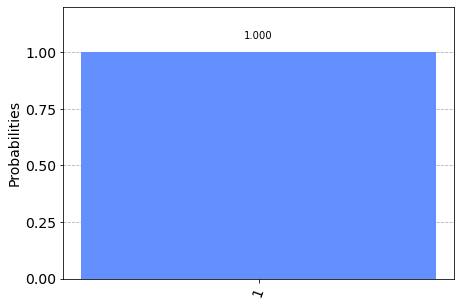

In [13]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

coeff1, coeff2 = 0, 1 # or
i_qubit = 0
# coeff1, coeff2 = 0 + 0j, 1 + 0j # j stands for indeterminate
qc_stv = QuantumCircuit(1)
initial_state = [coeff1, coeff2]
qc_stv.initialize(initial_state, i_qubit)
# save state vector for result
qc_stv.save_statevector()
rlt = sim.run(qc_stv).result()
# output state vector
out_state = rlt.get_statevector()
print("output state vector: ", out_state)
#output histogram
counts = rlt.get_counts()
print("output histogram:")
plot_histogram(counts)


In [14]:
# other initial state
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc_stv1 = QuantumCircuit(1)
qc_stv1.initialize(initial_state, 0)
qc_stv1.save_statevector()
print(sim.run(qc_stv1).result().get_statevector())



TypeError: 'list' object is not callable